In [17]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

from gpr.gpr import GPR
from gpr.kernels import RBF, RBF_SK

In [18]:
X = ss.uniform(loc=-2*np.pi, scale=4*np.pi).rvs(30)
X = X.reshape((-1, 1))

f = lambda x: 5*np.sin(x) + 3*np.cos(2*x)

sigma_n = 0.5

y = f(X) + ss.norm(loc=0, scale=sigma_n).rvs(X.shape)

In [19]:
rbf = RBF(sigma=1, l=0.4)

gpr = GPR(kernel=rbf)

In [20]:
gpr.fit(X=X, y=y, sigma_n=0.5)

In [21]:
# Predict
Xs = np.linspace(-2*np.pi, 2* np.pi, 100).reshape((-1, 1))

Fs, V = gpr.predict(Xs=Xs)

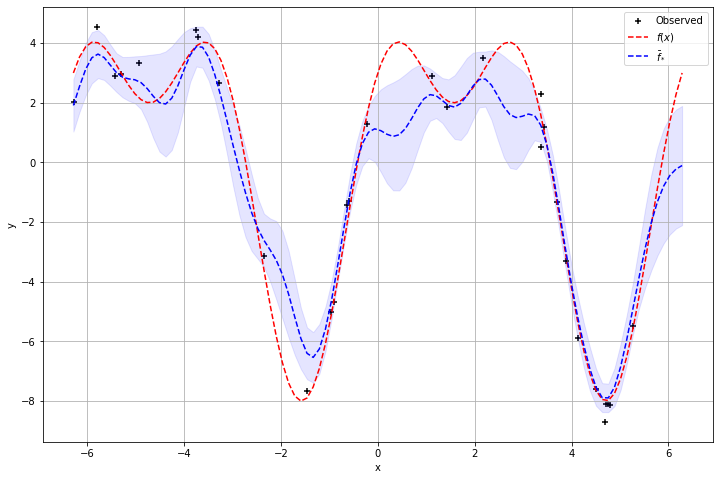

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(X, y, marker="+", color="black", label="Observed")
ax.plot(Xs.flatten(), f(Xs).flatten(), "r--", label=r"$f(x)$")
ax.plot(Xs.flatten(), Fs.flatten(), "b--", label=r"$\bar f_{*}$")
ax.fill_between(Xs.flatten(), Fs.flatten() - 2*np.sqrt(np.diag(V)), Fs.flatten() + 2*np.sqrt(np.diag(V)), color='b', alpha=.1)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [22]:
random_fs = gpr.sample(Xs=Xs, n=5)

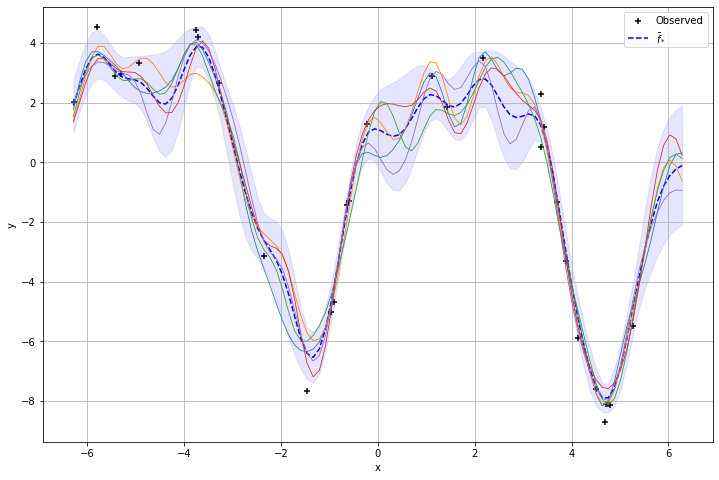

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(X, y, marker="+", color="black", label="Observed")
# ax.plot(Xs.flatten(), f(Xs).flatten(), "r--", label=r"$f(x)$")
ax.plot(Xs.flatten(), Fs.flatten(), "b--", label=r"$\bar f_{*}$")
for i in range(random_fs.shape[0]):
    ax.plot(Xs.flatten(), random_fs[i, :], linewidth=0.8)

ax.fill_between(Xs.flatten(), Fs.flatten() - 2*np.sqrt(np.diag(V)), Fs.flatten() + 2*np.sqrt(np.diag(V)), color='b', alpha=.1)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()